# Image Search with fastdup: Finding images in Large Dataset using CPU.

With the ever increasing data generated every day, it's becoming important to have efficient ways to search through large image dataset to find the ones you need.

If you only have a CPU only machine and want to search through a large dataset using image as queries, this tutorial is for you.

We will walk you through how to use fastdup to search through thousands of images and find similar looking images to your query image.

> **NOTE**: This is an advanced functionality of fastdup and would require a license key to run. Sign up to get a free license key at info@visual-layer.com .

## Installation & Setting Up

In [ ]:
!pip install pip -U
!pip install fastdup matplotlib

In [1]:
import fastdup
fastdup.__version__

'0.925'

## Download Dataset

In this notebook we will use the a dataset from Shopee Product Match Kaggle [Competition](https://www.kaggle.com/competitions/shopee-product-matching/data). In this competition participants must determine if two products are the same by their images.

Head to Kaggle and download the dataset into your local directory.

## Run fastdup

Point `input_dir` to the location you store the images. `work_dir` is a folder to store all fastdup artifacts generated from the run.

In [3]:
input_dir = "./shopee-product-matching"
work_dir = "./my-fastdup-workdir"

In [ ]:
fastdup.run(input_dir, work_dir)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-05-01 15:54:48 [INFO] Going to loop over dir shopee-product-matching
2023-05-01 15:54:48 [INFO] Found total 32415 images to run on, 32415 train, 0 test, name list 32415, counter 32415 
2023-05-01 15:56:06 [INFO] Found total 32415 images to run onimated: 0 Minutes
Finished histogram 11.111
Finished bucket sort 11.173
2023-05-01 15:56:10 [INFO] 3909) Finished write_index() NN model
2023-05-01 15:56:10 [INFO] Stored nn model index file my-fastdup-workdir/nnf.index
2023-05-01 15:56:12 [INFO] Total time took 83589 ms
2023-05-01 15:56:12 [INFO] Found a total of 8020 fully identical images (d>0.990), which are 12.37 %
2023-05-01 15:56:12 [INFO] Found a total of 3283 nearly identical images(d>0.980), which are 5.06 %
2023-05-01 15:56:12 [INFO] Found a total of 24447 above threshold images (d>0.900), which are 37.71 %
2023-05-01 15:56:12 [INFO] Found a total of 3241 outlier images         (d<0.050), which are 5.00 %

0

## Initialize Search Parameters

Once the run is completed, let's initialize the search parameters.

The first positional argument is `k` - The number of nearest neighbors to search for. In this case we want to search for 10 nearest neighbor. Feel free to experiment with your own number of `k`.

In [4]:
fastdup.init_search(10, work_dir, license='magical')

2023-05-01 16:15:19 [INFO] 50) Finished load_index() NN model, num_images 32415
2023-05-01 16:15:19 [INFO] Read nnf index file from ./my-fastdup-workdir/nnf.index 1
2023-05-01 16:15:19 [INFO] Read NNF index with 32415 images


0

## Search with a Query Image

Let's use our own image and find out if there are matches in the shopee dataset.

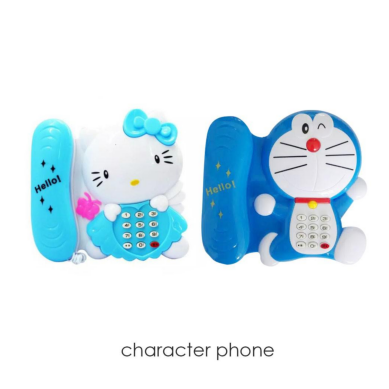

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image file
img = mpimg.imread("test_image.jpg")

# Display the image in the notebook
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
df = fastdup.search("test_image.jpg", None, verbose=True)

char vec0 :[255, 255, 255, 255, 255, 255, 255, 255, 255]
char vec672 :[255, 255, 255, 255, 255, 255, 255, 255, 255]
char vec1344 :[255, 255, 255, 255, 255, 255, 255, 255, 255]

Image from python side:
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]


resized 224:
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]


RGB:
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]
[[255, 255, 255], [255, 255, 255], [255, 255, 255]]

0 :[255.0000, 255.0000, 255.0000, 255.0000, 255.0000, 255.0000, 255.0000, 255.0000, 255.0000, 255.0000]
2023-05-01 16:15:21 [DEBUG] Inner inference took 6 (test? 0)
output_tensor0 :[-0.0099, 0.1831, 0.3639, 0.6406, -0.1470, 0.8192, 0.7050, 0.9975, 0.2361, 0.8125]
output_tensor_end0 :[0.6264, -0.1192, 0.0089

## Visualize Results

This step is optional. fastdup provides a convenient way to visualize your search results for duplicate and similar looking images.

In [7]:
fastdup.create_duplicates_gallery(df, ".", input_dir=input_dir)

100%|████████████████████████| 10/10 [00:00<00:00, 69.48it/s]


Stored similarity visual view in  ./duplicates.html


0


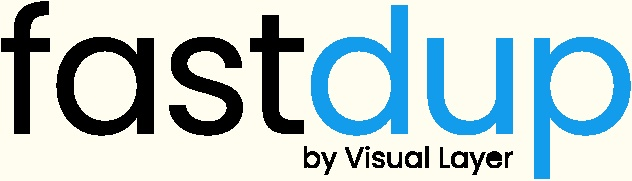
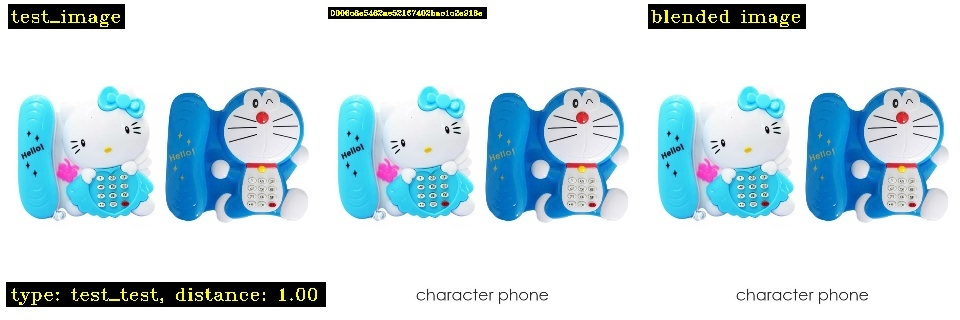
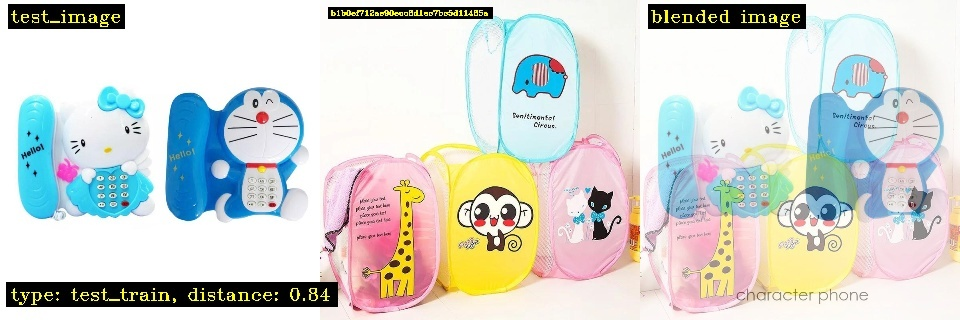
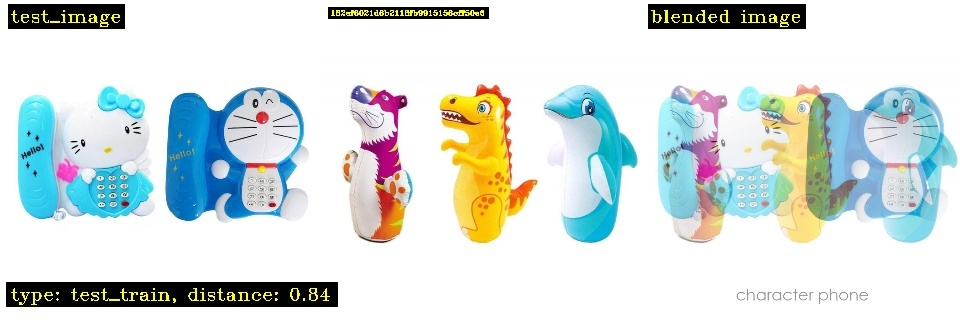
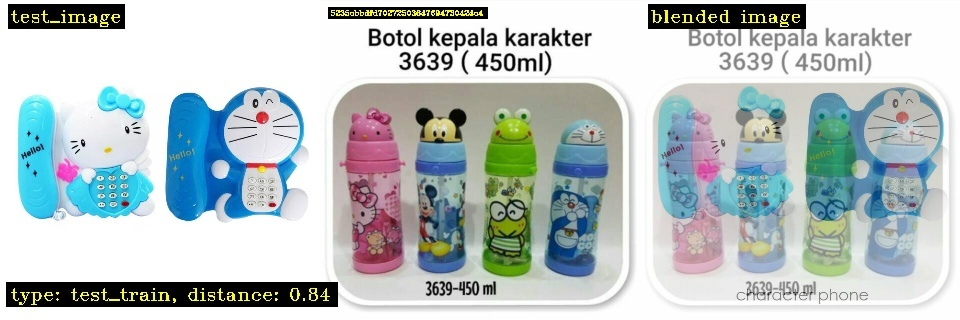
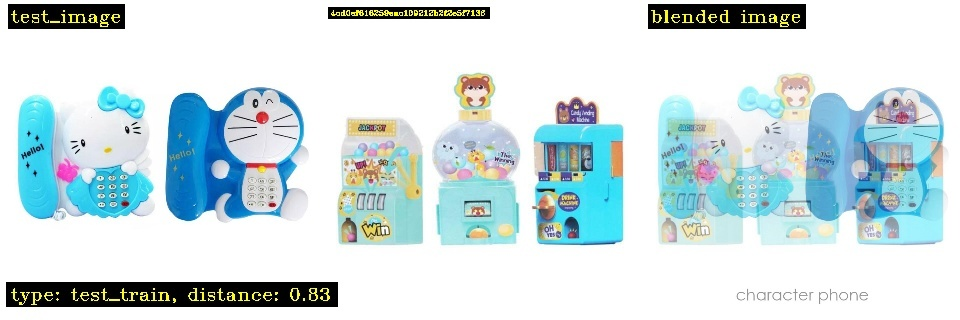
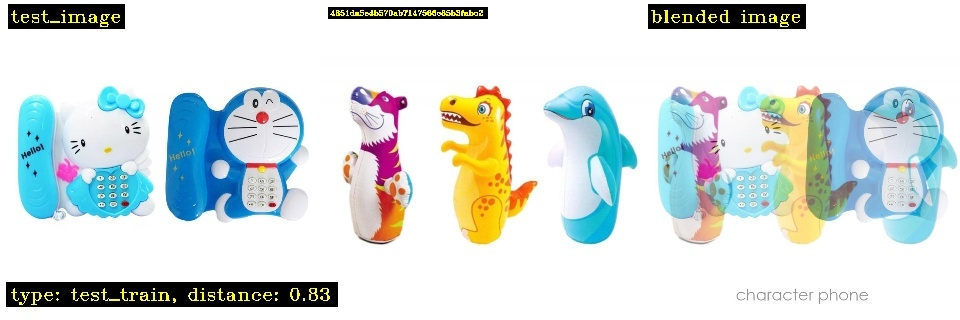
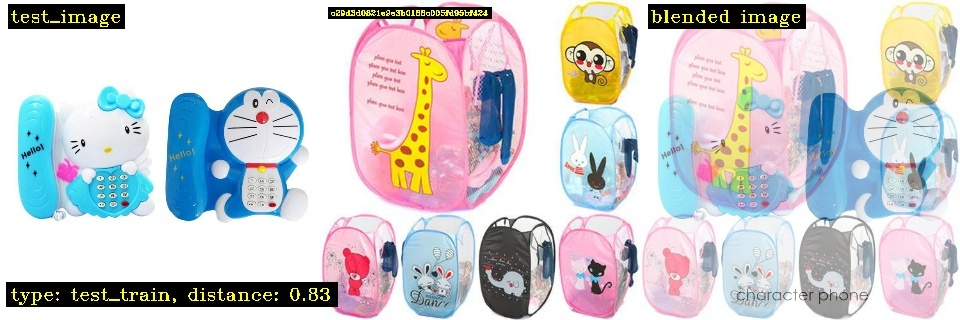
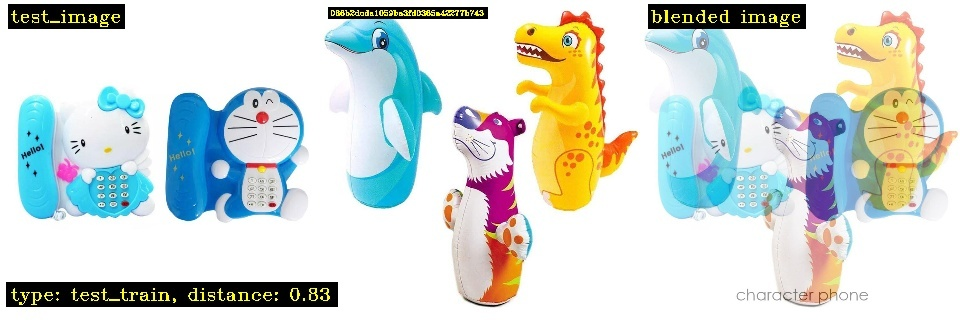
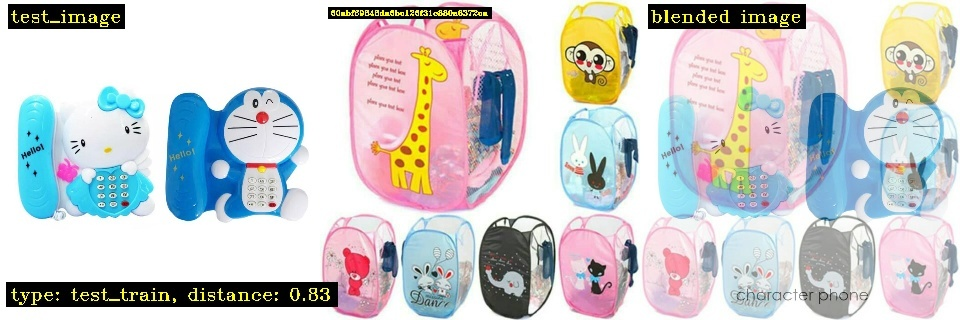
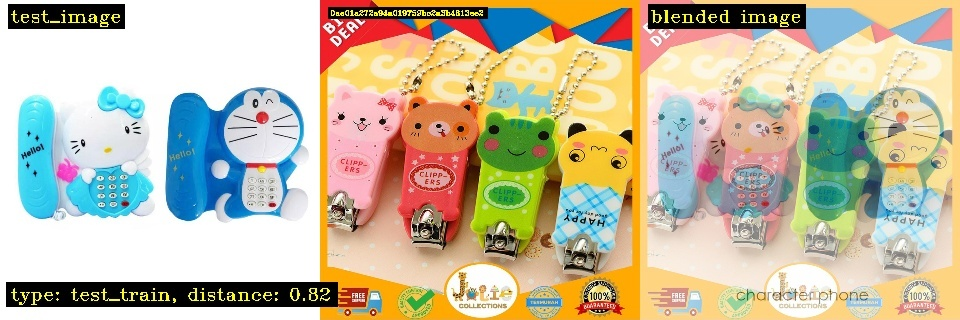

In [8]:
from IPython.display import HTML
HTML(filename="duplicates.html")

In [9]:
fastdup.create_similarity_gallery(df, ".", input_dir=input_dir, min_items=3)

100%|██████████████████████████| 1/1 [00:00<00:00,  4.87it/s]

Stored similar images visual view in  ./similarity.html


,from,to,distance
0,test_image.jpg,"[shopee-product-matching/train_images/0ae01a272a94a019759bc2a3b4813ee2.jpg, shopee-product-matching/train_images/60abf69848da6bc126f31c880a6372ca.jpg, shopee-product-matching/train_images/086b2dcda1059ba3fd0365a42277b743.jpg, shopee-product-matching/train_images/c29d3d0821e9e3b0188c005fd95bf424.jpg, shopee-product-matching/train_images/4851da5e4b570ab7147566c85b3fabc2.jpg, shopee-product-matching/train_images/4cd0ef616259eac109212b2f2e5f7136.jpg, shopee-product-matching/train_images/5235cbbdfd70272503647694730424c4.jpg, shopee-product-matching/train_images/182ef6021d6b2118fb9915156cff50e6.jpg, shopee-product-matching/train_images/b1b0ef712ae90ecc8d1ec7bc5d11485a.jpg, shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg]","[0.822049, 0.825624, 0.82821, 0.828526, 0.829968, 0.830368, 0.836889, 0.841552, 0.842375, 1.0]"



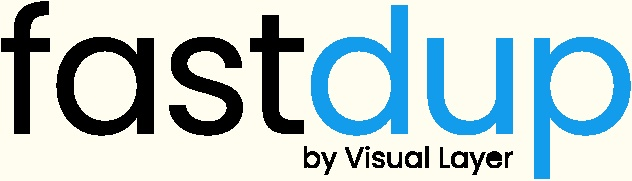
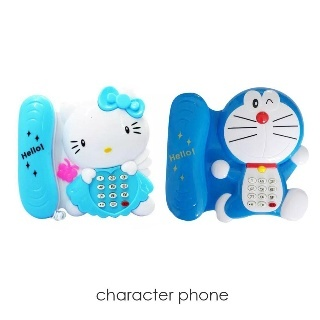
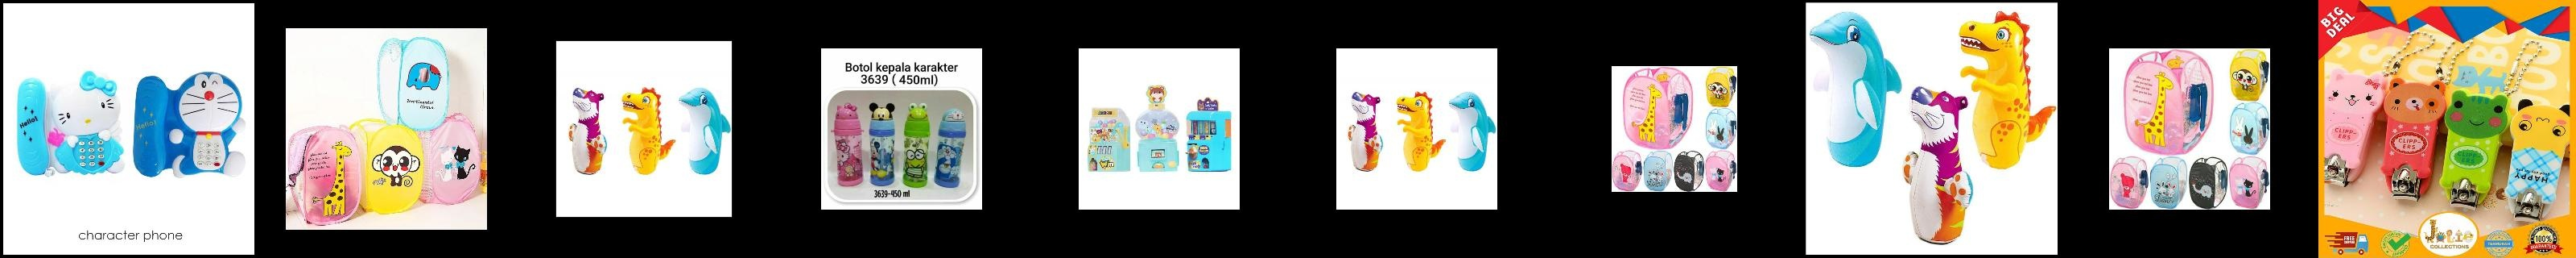

In [10]:
HTML(filename="similarity.html")